# Edulumos Internship Task-04 : A Data Analytics Project on EDA

### Description: 
Explore the Titanic dataset to uncover insights by handling 
missing values, studying data distributions, and analyzing feature 
relationships. Visualize patterns using histograms, bar charts, and 
heatmaps. 
- Learning skills: Data cleaning, exploratory visualization 
(Matplotlib, Seaborn), and foundational statistical analysis. 

In [1]:
# importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing data in csv form from kaggle 
data= pd.read_csv(r"C:\Users\Sana\Downloads\tested.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Section 1: Data Cleaning & Understanding

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


## What columns contain missing values, and how many missing values are there in each column?

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

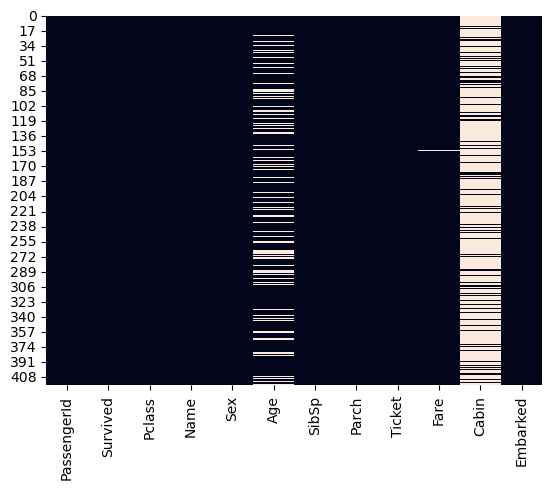

In [6]:
sns.heatmap(data.isnull(), cbar=False)

## What strategies can be used to handle missing values in the Age, Cabin, and Embarked columns?

In [7]:
# Dropping cabin column as not needed in analysis
data.drop(columns=['Cabin'],inplace=True)

In [8]:
# filling age with avg value of age
data["Age"] = data['Age'].fillna(data['Age'].mean())

In [9]:
# same with fare price
data["Fare"] = data['Fare'].fillna(data['Fare'].mean())

## What is the data type of each column? Do any columns need to be converted (e.g., categorical to numeric)?

In [10]:
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'], dtype=object)

- Categorical Columns
    - Survived
    - PClass
    - Sex
    - SibSp
    - Parch
    - Embarked
- Numerical Columns
    - PassengerId
    - Age
    - Fare
    
- Mixed Columns
    - Name
    - Ticket
    - Cabin

In [11]:
# changing data type 
data['Sex']=data['Sex'].astype('category')
data['Age']=data['Age'].astype('int')
data['Embarked']=data['Embarked'].astype('category')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Survived     418 non-null    int64   
 2   Pclass       418 non-null    int64   
 3   Name         418 non-null    object  
 4   Sex          418 non-null    category
 5   Age          418 non-null    int32   
 6   SibSp        418 non-null    int64   
 7   Parch        418 non-null    int64   
 8   Ticket       418 non-null    object  
 9   Fare         418 non-null    float64 
 10  Embarked     418 non-null    category
dtypes: category(2), float64(1), int32(1), int64(5), object(2)
memory usage: 29.0+ KB


In [13]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.191388,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.654104,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Are there any duplicate records in the dataset? If so, how can they be removed?

In [14]:
data.duplicated().sum()
data.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,30,0,0,359309,8.0500,S


## What is the overall survival rate on the Titanic?

In [15]:
data["Survived"].astype(int).mean()*100

36.36363636363637

# Section 2: Exploratory Data Analysis (EDA)

## What is the distribution of passengers by gender (Sex)?

In [16]:
data["Sex"].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

## What is the age distribution of passengers? (Use a histogram plot)


<Axes: xlabel='Age', ylabel='Count'>

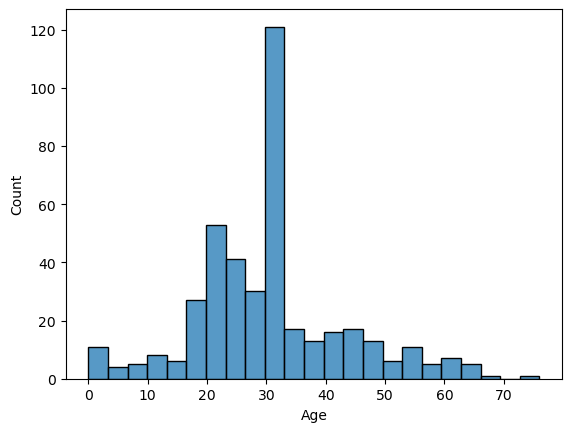

In [17]:
sns.histplot(data['Age'])

## What is the distribution of ticket classes (Pclass) among passengers?


<Axes: xlabel='Pclass', ylabel='count'>

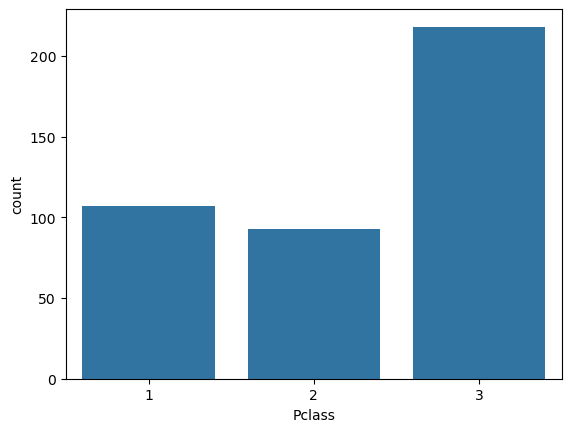

In [18]:
sns.countplot(x='Pclass', data=data)

## How does the fare vary across different classes? (Use boxplots or violin plots)


<Axes: xlabel='Pclass', ylabel='Fare'>

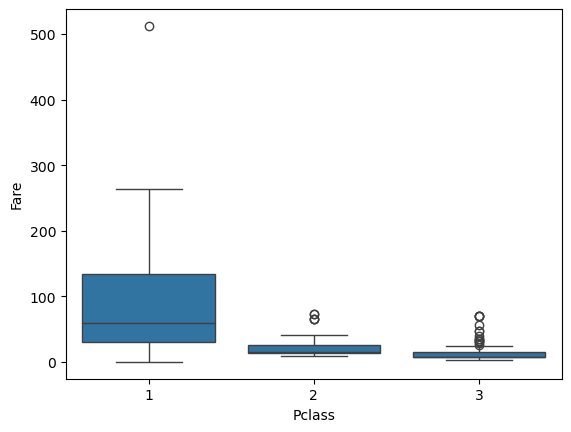

In [19]:
sns.boxplot(x='Pclass', y='Fare', data=data)

## Which port (Embarked) did most passengers board from?

<Axes: xlabel='Embarked', ylabel='count'>

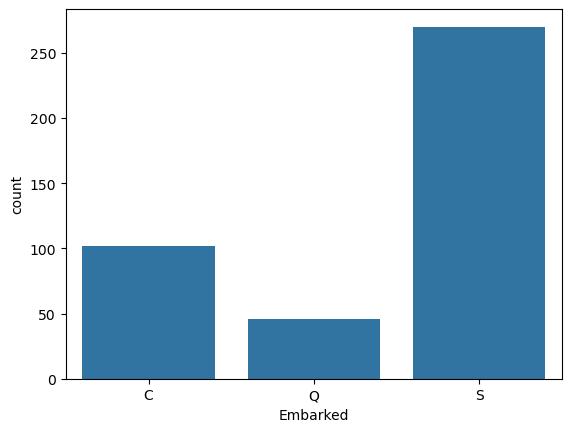

In [20]:
sns.countplot(x='Embarked', data=data)

# Section 3: Feature Relationships & Insights

## What is the survival rate by gender?

In [21]:
data.groupby('Sex',observed = False)["Survived"].mean()*100

Sex
female    100.0
male        0.0
Name: Survived, dtype: float64

## What is the survival rate by passenger class (Pclass)?

In [22]:
data.groupby("Pclass" , observed=False)[["Survived"]].mean()*100

,Survived
Pclass,
1,46.728972
2,32.258065
3,33.027523


## Is there a relationship between age and survival? (Scatter plot or age group comparison)

<Axes: xlabel='Age', ylabel='Survived'>

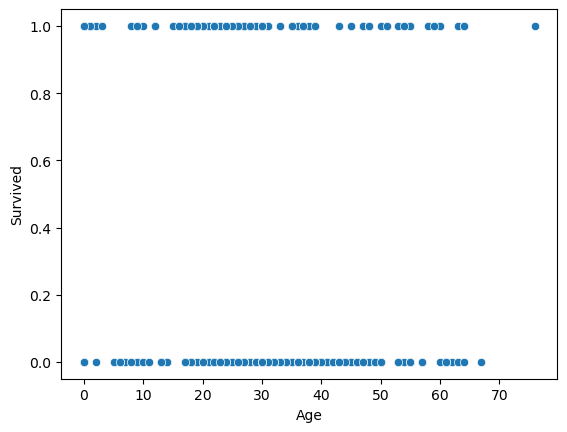

In [23]:
sns.scatterplot(x='Age', y='Survived', data=data)

## How does fare relate to survival probability? (Use histogram or boxplot)

<Axes: xlabel='Fare', ylabel='Survived'>

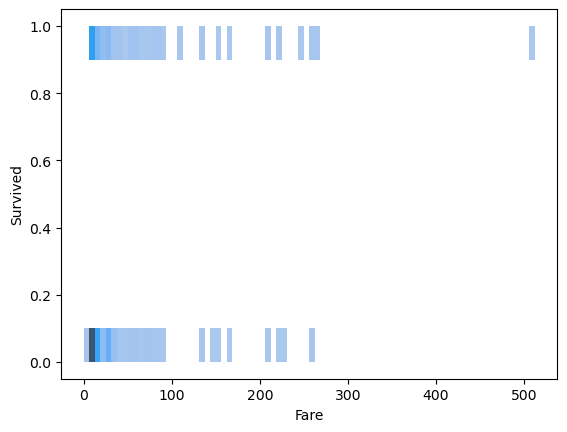

In [24]:
sns.histplot(x="Fare",y="Survived",data=data)

## Which family-related features (SibSp, Parch) seem to influence survival?

In [25]:
data["Family"] = data["SibSp"] + data["Parch"]

In [26]:
data.groupby('Family')['Survived'].mean() * 100

Family
0     26.877470
1     48.648649
2     52.631579
3     71.428571
4     28.571429
5     66.666667
6     25.000000
7     50.000000
10    50.000000
Name: Survived, dtype: float64

# Section 4: Statistical & Correlation Analysis

## Compute the correlation matrix and visualize it using a heatmap. Which variables are most correlated with survival?

In [27]:
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
df_numeric = data[numeric_cols]

In [28]:
corr_matrix = df_numeric.corr()
print(corr_matrix)

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.108615  0.001538  0.099943  0.159120  0.191382
Pclass   -0.108615  1.000000 -0.443531  0.001087  0.018721 -0.576619
Age       0.001538 -0.443531  1.000000 -0.079203 -0.045259  0.328250
SibSp     0.099943  0.001087 -0.079203  1.000000  0.306895  0.171488
Parch     0.159120  0.018721 -0.045259  0.306895  1.000000  0.230001
Fare      0.191382 -0.576619  0.328250  0.171488  0.230001  1.000000


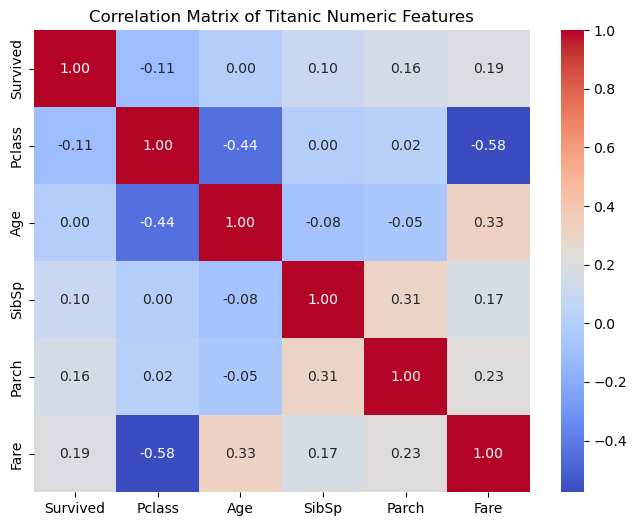

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Titanic Numeric Features")
plt.show()

## What is the average age and fare for survivors vs non-survivors?

In [30]:
a=data.groupby("Survived")
a.agg({"Age":"mean","Fare":"mean"})

,Age,Fare
Survived,,
0,30.176692,27.558326
1,30.217105,49.747699


## Does the class (Pclass) significantly impact the average fare and survival rate?

In [31]:
data.groupby("Pclass",observed=False).agg(
    Survived_Rate = ("Survived", lambda x: x.mean()*100),
    Fare_Rate = ("Fare", "mean"))

,Survived_Rate,Fare_Rate
Pclass,,
1,46.728972,94.280297
2,32.258065,22.202104
3,33.027523,12.565951


# Section 5: Visualization Practice (Matplotlib & Seaborn)

## Create a countplot of passengers by class and survival status.

<Axes: xlabel='Pclass', ylabel='count'>

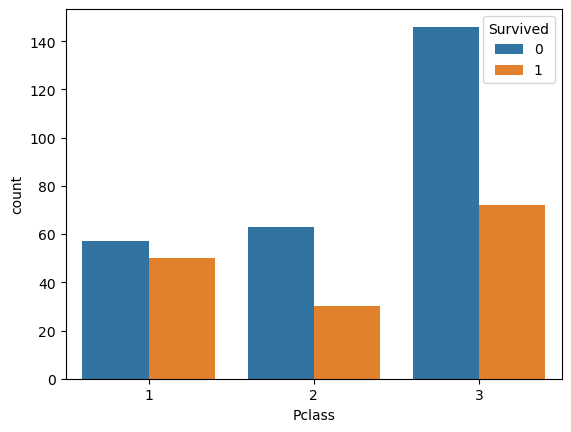

In [32]:
sns.countplot(x="Pclass",hue="Survived",data=data)

## Create a chart comparing survival rates across embarkation points (Embarked).

<Axes: xlabel='Embarked', ylabel='Survived'>

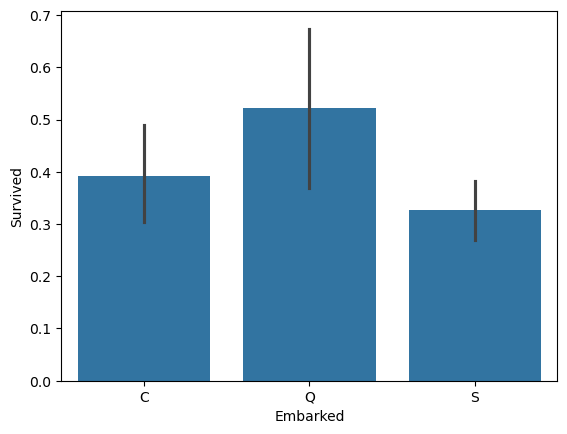

In [33]:
sns.barplot(x='Embarked', y='Survived', data=data)

## Create a pairplot of numerical features (Age, Fare, Pclass) color-coded by survival.

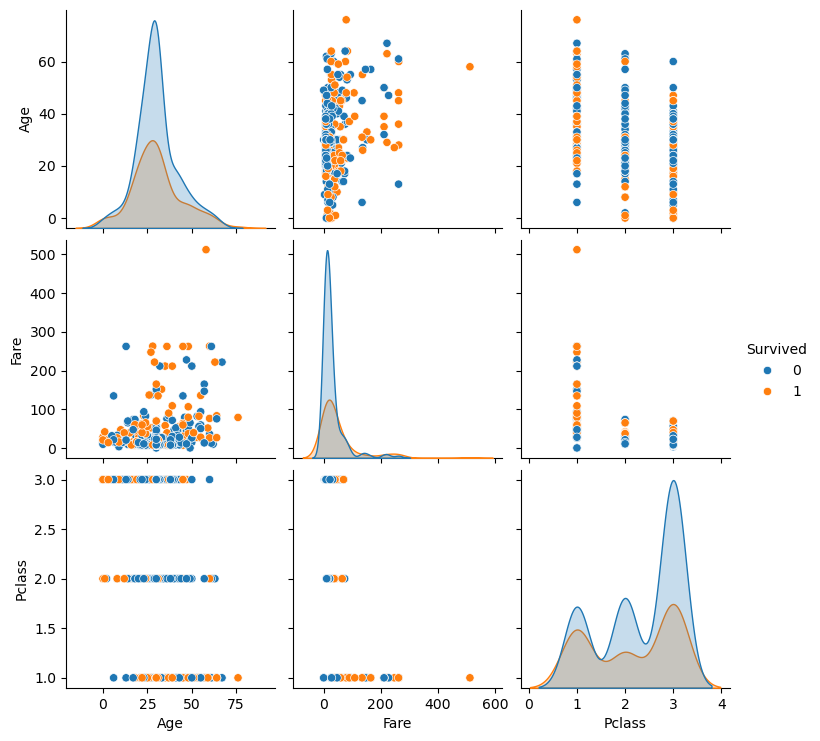

In [34]:
sns.pairplot(data, vars=['Age','Fare','Pclass'], hue='Survived')

# Drawing Conclusions from Titanic Dataset

Gender:
- Females had a higher chance of survival compared to males.

Passenger Class (Pclass):
- Most deaths occurred among passengers in Pclass 3 (third class), indicating lower survival rates for lower-class travelers.

Port of Embarkation (Embarked):
- Passengers embarking from Q (Queenstown) had comparatively higher survival rates.

Age:
- Individuals aged 20–40 had a higher likelihood of not surviving the disaster.

Family Size (SibSp + Parch):
- Passengers traveling with smaller families had better chances of survival compared to those traveling alone or with large families.